# Orthopaedic Surgeries 2019

## Libraries and Data Import 

In [1]:
import pandas as pd
import scipy 
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline
import math
from matplotlib import pyplot

In [2]:
dataset = pd.read_csv('merged_data.csv', low_memory=False)

## Data Visualization and Exploration

In [3]:
pd.set_option('display.max_columns', None)
dataset.head()

,Unnamed: 0,PUFYEAR,CASEID,SEX,RACE_NEW,ETHNICITY_HISPANIC,PRNCPTX,CPT,WORKRVU,INOUT,TRANST,AGE,ADMYR,OPERYR,DISCHDEST,ANESTHES,SURGSPEC,ELECTSURG,HEIGHT,WEIGHT,DIABETES,SMOKE,DYSPNEA,FNSTATUS2,VENTILAT,HXCOPD,ASCITES,HXCHF,HYPERMED,RENAFAIL,DIALYSIS,DISCANCR,WNDINF,STEROID,WTLOSS,BLEEDIS,TRANSFUS,PRSEPIS,DPRNA,DPRBUN,DPRCREAT,DPRALBUM,DPRBILI,DPRSGOT,DPRALKPH,DPRWBC,DPRHCT,DPRPLATE,DPRPTT,DPRPT,DPRINR,PRSODM,PRBUN,PRCREAT,PRALBUM,PRBILI,PRSGOT,PRALKPH,PRWBC,PRHCT,PRPLATE,PRPTT,PRINR,PRPT,OTHERPROC1,OTHERCPT1,OTHERWRVU1,OTHERPROC2,OTHERCPT2,OTHERWRVU2,OTHERPROC3,OTHERCPT3,OTHERWRVU3,OTHERPROC4,OTHERCPT4,OTHERWRVU4,OTHERPROC5,OTHERCPT5,OTHERWRVU5,OTHERPROC6,OTHERCPT6,OTHERWRVU6,OTHERPROC7,OTHERCPT7,OTHERWRVU7,OTHERPROC8,OTHERCPT8,OTHERWRVU8,OTHERPROC9,OTHERCPT9,OTHERWRVU9,OTHERPROC10,OTHERCPT10,OTHERWRVU10,CONCURR1,CONCPT1,CONWRVU1,CONCURR2,CONCPT2,CONWRVU2,CONCURR3,CONCPT3,CONWRVU3,CONCURR4,CONCPT4,CONWRVU4,CONCURR5,CONCPT5,CONWRVU5,CONCURR6,CONCPT6,CONWRVU6,CONCURR7,CONCPT7,CONWRVU7,CONCURR8,CONCPT8,CONWRVU8,CONCURR9,CONCPT9,CONWRVU9,CONCURR10,CONCPT10,CONWRVU10,EMERGNCY,WNDCLAS,ASACLAS,MORTPROB,MORBPROB,OPTIME,HDISDT,YRDEATH,TOTHLOS,ADMQTR,HTOODAY,NSUPINFEC,SUPINFEC,SSSIPATOS,DSUPINFEC,NWNDINFD,WNDINFD,DSSIPATOS,DWNDINFD,NORGSPCSSI,ORGSPCSSI,OSSIPATOS,DORGSPCSSI,NDEHIS,DEHIS,DDEHIS,NOUPNEUMO,OUPNEUMO,PNAPATOS,DOUPNEUMO,NREINTUB,REINTUB,DREINTUB,NPULEMBOL,PULEMBOL,DPULEMBOL,NFAILWEAN,FAILWEAN,VENTPATOS,DFAILWEAN,NRENAINSF,RENAINSF,DRENAINSF,NOPRENAFL,OPRENAFL,DOPRENAFL,NURNINFEC,URNINFEC,UTIPATOS,DURNINFEC,NCNSCVA,CNSCVA,DCNSCVA,NCDARREST,CDARREST,DCDARREST,NCDMI,CDMI,DCDMI,NOTHBLEED,OTHBLEED,DOTHBLEED,NOTHDVT,OTHDVT,DOTHDVT,NOTHSYSEP,OTHSYSEP,SEPSISPATOS,DOTHSYSEP,NOTHSESHOCK,OTHSESHOCK,SEPSHOCKPATOS,DOTHSESHOCK,PODIAG,PODIAGTX,PODIAG10,PODIAGTX10,RETURNOR,DOPERTOD,DOPTODIS,STILLINHOSP,REOPERATION1,RETORPODAYS,REOPORCPT1,RETORRELATED,REOPORICD91,REOPOR1ICD101,REOPERATION2,RETOR2PODAYS,REOPOR2CPT1,RETOR2RELATED,REOPOR2ICD91,REOPOR2ICD101,REOPERATION3,READMISSION1,READMPODAYS1,UNPLANNEDREADMISSION1,READMRELATED1,READMSUSPREASON1,READMUNRELSUSP1,READMRELICD91,READMRELICD101,READMUNRELICD91,READMUNRELICD101,READMISSION2,READMPODAYS2,UNPLANNEDREADMISSION2,READMRELATED2,READMSUSPREASON2,READMUNRELSUSP2,READMRELICD92,READMRELICD102,READMUNRELICD92,READMUNRELICD102,READMISSION3,READMPODAYS3,UNPLANNEDREADMISSION3,READMRELATED3,READMSUSPREASON3,READMUNRELSUSP3,READMRELICD93,READMRELICD103,READMUNRELICD93,READMUNRELICD103,READMISSION4,READMPODAYS4,UNPLANNEDREADMISSION4,READMRELATED4,READMSUSPREASON4,READMUNRELSUSP4,READMRELICD94,READMRELICD104,READMUNRELICD94,READMUNRELICD104,READMISSION5,READMPODAYS5,UNPLANNEDREADMISSION5,READMRELATED5,READMSUSPREASON5,READMUNRELSUSP5,READMRELICD95,READMRELICD105,READMUNRELICD95,READMUNRELICD105,WOUND_CLOSURE,PODIAG_OTHER,PODIAG_OTHER10,ANESTHES_OTHER,OTHCDIFF,NOTHCDIFF,DOTHCDIFF,Unnamed: 274,RETOR1PODAYS,RETOR1RELATED,REOPOR1ICD91,DPUFYEAR,ADMSYR,ATTEND,PACKS,ETOH,DNR,FNSTATUS1,CPNEUMON,ESOVAR,HXMI,PRVPCI,PRVPCS,HXANGINA,HXPVD,RESTPAIN,IMPSENS,COMA,HEMI,HXTIA,CVA,CVANO,TUMORCNS,PARA,QUAD,CHEMO,RADIO,PREGNANCY,PROPER30,OPNOTE,PGY,AIRTRA,MALLAMP,RBC,ANESURG,SURGANE,DPATRM,ANETIME,TYPEINTOC,SDISDT,STOODAY,TOTSLOS,NCNSCOMA,CNSCOMA,DCNSCOMA,NNEURODEF,NEURODEF,DNEURODEF,NOTHGRAFL,OTHGRAFL,DOTHGRAFL,DSDTOHD,READMISSION,UNPLANREADMISSION,REOPERATION
0,0,2019.0,9147890,male,White,No,MUSC MYOCUTANEOUS/FASCIOCUTANEOUS FLAP LXTR,15738,19.04,Inpatient,Not transferred (admitted from home),22,2019,2019,Home,General,Orthopedics,Yes,70,249,NO,No,No,Independent,No,No,No,No,No,No,No,No,No,No,No,No,No,None,-99,-99,-99,-99,-99,-99,-99,15,15,15,15,-99,15,-99.0,-99.0,-99.00,-99.0,-99.0,-99.0,-99.0,6.84,48.1,227.0,29.0,1.0,-99.0,AMP LEG THRU TIBFIB W/IMMT FITG TQ W/1ST CST,27881,13.47,NaN,NaN,-99.00,NaN,NaN,-99.0,NaN,NaN,-99.0,NaN,NaN,-99.0,NaN,NaN,-99.0,NaN,NaN,-99.0,NaN,NaN,-99.0,NaN,NaN,-99.0,NaN,NaN,-99.0,NaN,NaN,-99.00,NaN,NaN,-99.0,NaN,NaN,-99.0,NaN,NaN,-99.0,NaN,NaN,-99.0,NaN,NaN,-99.0,NaN,NaN,-99.0,NaN,NaN,-99.0,NaN

In [4]:
dataset.columns

Index(['Unnamed: 0', 'PUFYEAR', 'CASEID', 'SEX', 'RACE_NEW',
       'ETHNICITY_HISPANIC', 'PRNCPTX', 'CPT', 'WORKRVU', 'INOUT',
       ...
       'NNEURODEF', 'NEURODEF', 'DNEURODEF', 'NOTHGRAFL', 'OTHGRAFL',
       'DOTHGRAFL', 'DSDTOHD', 'READMISSION', 'UNPLANREADMISSION',
       'REOPERATION'],
      dtype='object', length=333)

## Create a new dataset by including only necessary features

In [5]:
# Predicting TOTHLOS using pre-operative factors
data = dataset[['SEX','RACE_NEW','ETHNICITY_HISPANIC',
                'INOUT','AGE','ELECTSURG','HEIGHT','WEIGHT',
                'DIABETES','SMOKE','DYSPNEA', 'FNSTATUS2', 
                'VENTILAT', 'HXCOPD', 'ASCITES', 'HXCHF', 'HYPERMED', 
                'RENAFAIL', 'DIALYSIS', 'DISCANCR', 'HTOODAY', 'WNDINF', 
                'STEROID', 'WTLOSS', 'BLEEDIS', 'PRSEPIS','EMERGNCY',
                'WNDCLAS', 'ASACLAS', 'MORTPROB', 'MORBPROB', 'OUPNEUMO',
                'PRSODM','PRBUN','PRCREAT','PRALBUM','PRBILI','PRSGOT',
                'PRALKPH','PRWBC','PRHCT','PRPLATE','PRPTT','PRINR','TOTHLOS']]

In [6]:
data

,SEX,RACE_NEW,ETHNICITY_HISPANIC,INOUT,AGE,ELECTSURG,HEIGHT,WEIGHT,DIABETES,SMOKE,DYSPNEA,FNSTATUS2,VENTILAT,HXCOPD,ASCITES,HXCHF,HYPERMED,RENAFAIL,DIALYSIS,DISCANCR,HTOODAY,WNDINF,STEROID,WTLOSS,BLEEDIS,PRSEPIS,EMERGNCY,WNDCLAS,ASACLAS,MORTPROB,MORBPROB,OUPNEUMO,PRSODM,PRBUN,PRCREAT,PRALBUM,PRBILI,PRSGOT,PRALKPH,PRWBC,PRHCT,PRPLATE,PRPTT,PRINR,TOTHLOS
0,male,White,No,Inpatient,22,Yes,70,249,NO,No,No,Independent,No,No,No,No,No,No,No,No,0.0,No,No,No,No,None,No,1-Clean,1-No Disturb,0.000056,0.050692,No Complication,-99.0,-99.0,-99.00,-99.0,-99.0,-99.0,-99.0,6.84,48.1,227.0,29.0,1.00,2
1,male,White,No,Outpatient,70,Yes,66,178,NO,No,No,Independent,No,No,No,No,Yes,No,No,No,0.0,Yes,No,No,No,None,No,2-Clean/Contaminated,3-Severe Disturb,0.002782,0.094279,No Complication,-99.0,-99.0,-99.00,-99.0,-99.0,-99.0,-99.0,-99.00,-99.0,-99.0,-99.0,-99.00,0
2,male,White,No,Inpatient,63,No,65,120,NO,Yes,MODERATE EXERTION,Independent,No,No,No,No,Yes,No,No,Yes,6.0,Yes,No,No,No,None,No,1-Clean,3-Severe Disturb,0.120926,0.298060,No Complication,142.0,23.0,1.68,1.9,0.3,55.0,169.0,8.98,32.9,533.0,-99.0,1.00,12
3,male,White,No,Inpatient,84,No,67,186,NO,No,MODERATE EXERTION,Independent,No,Yes,No,No,Yes,No,No,No,10.0,No,No,No,No,None,No,3-Contaminated,2-Mild Disturb,0.034261,0.391275,No Complication,138.0,17.0,1.03,2.4,0.4,20.0,80.0,9.20,30.0,412.0,22.4,1.40,19
4,male,White,No,Inpatient,71,Yes,64,228,NO,No,No,Independent,No,No,No,No,Yes,No,No,No,0.0,No,No,No,No,None,No,1-Clean,3-Severe Disturb,0.001499,0.033742,No Complication,138.0,23.0,1.27,-99.0,-99.0,-99.0,-99.0,10.33,50.3,237.0,28.6,0.90,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404515,male,White,No,Inpatient,59,Yes,74,264,NO,No,No,Independent,No,No,No,No,Yes,No,No,No,1.0,No,No,No,No,None,No,2-Clean/Contaminated,2-Mild Disturb,0.001381,0.027210,No Complication,137.0,19.0,0.83,-99.0,-99.0,-99.0,-99.0,8.20,41.4,324.0,-99.0,-99.00,7
404516,male,Black or African American,No,Inpatient,53,Yes,66,190,INSULIN,No,No,Independent,No,No,No,No,Yes,No,No,No,2.0,Yes,No,No,No,Sepsis,No,4-Dirty/Infected,3-Severe Disturb,0.012530,0.087769,No Complication,132.0,21.0,1.45,2.2,0.4,18.0,178.0,22.30,28.4,466.0,-99.0,-99.00,9
404517,male,White,Unk,Inpatient,22,Yes,69,158,NO,No,No,Independent,No,No,No,No,No,No,No,No,0.0,No,No,No,No,None,No,1-Clean,1-No Disturb,0.000116,0.036015,No Complication,-99.0,-99.0,-99.00,-99.0,-99.0,-99.0,-99.0,-99.00,-99.0,-99.0,-99.0,-99.00,7
404518,male,White,Unk,Inpatient,65,Yes,68,238,NO,No,No,Independent,No,No,No,No,Yes,No,No,No,0.0,No,No,No,No,None,No,1-Clean,3-Severe Disturb,0.000848,0.029510,No Complication,141.0,20.0,1.12,4.9,0.7,26.0,45.0,7.50,46.4,233.0,-99.0,0.90,7


In total, after cutting the dataset, we have 44 features. 

# Data Preprocessing

In [7]:
data.describe()

,HEIGHT,WEIGHT,HTOODAY,MORTPROB,MORBPROB,PRSODM,PRBUN,PRCREAT,PRALBUM,PRBILI,PRSGOT,PRALKPH,PRWBC,PRHCT,PRPLATE,PRPTT,PRINR,TOTHLOS
count,404520.000000,404520.000000,404520.000000,404520.000000,404520.000000,404520.000000,404520.000000,404520.000000,404520.000000,404520.000000,404520.000000,404520.000000,404520.000000,404520.000000,404520.000000,404520.000000,404520.000000,404520.000000
mean,58.650354,176.575732,0.734133,0.016757,0.050651,103.888241,-4.958362,-13.190841,-47.093932,-53.837728,-42.074616,-12.600596,-6.430930,20.533780,193.690141,-47.146312,-42.351836,4.448470
std,33.612648,68.104258,3.243691,0.043999,0.049617,84.287202,48.571114,34.905334,51.402464,49.595867,65.325825,99.808119,36.960316,46.813281,139.732392,63.431177,49.603673,8.302149
min,-99.000000,-99.000000,-99.000000,0.000004,0.001718,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000
25%,62.000000,145.000000,0.000000,0.000386,0.019004,135.000000,9.000000,0.620000,-99.000000,-99.000000,-99.000000,-99.000000,5.250000,32.000000,159.000000,-99.000000,-99.000000,1.000000
50%,65.000000,178.000000,0.000000,0.001316,0.032118,139.000000,15.000000,0.800000,1.900000,-99.000000,-99.000000,-99.000000,7.080000,38.100000,219.000000,-99.000000,0.910000,3.000000
75%,69.000000,213.000000,1.000000,0.010288,0.067973,141.000000,20.728000,1.010000,3.900000,0.500000,21.000000,77.000000,9.200000,42.000000,273.000000,28.000000,1.020000,6.000000
max,87.000000,574.000000,120.000000,0.914106,0.672420,192.000000,198.880000,15.000000,10.000000,15.000000,1000.000000,1000.000000,220.700000,60.000000,1000.000000,120.000000,10.000000,119.000000


In [8]:
data.columns

Index(['SEX', 'RACE_NEW', 'ETHNICITY_HISPANIC', 'INOUT', 'AGE', 'ELECTSURG',
       'HEIGHT', 'WEIGHT', 'DIABETES', 'SMOKE', 'DYSPNEA', 'FNSTATUS2',
       'VENTILAT', 'HXCOPD', 'ASCITES', 'HXCHF', 'HYPERMED', 'RENAFAIL',
       'DIALYSIS', 'DISCANCR', 'HTOODAY', 'WNDINF', 'STEROID', 'WTLOSS',
       'BLEEDIS', 'PRSEPIS', 'EMERGNCY', 'WNDCLAS', 'ASACLAS', 'MORTPROB',
       'MORBPROB', 'OUPNEUMO', 'PRSODM', 'PRBUN', 'PRCREAT', 'PRALBUM',
       'PRBILI', 'PRSGOT', 'PRALKPH', 'PRWBC', 'PRHCT', 'PRPLATE', 'PRPTT',
       'PRINR', 'TOTHLOS'],
      dtype='object')

### Replacing all missing values

In [9]:
data.replace(to_replace=-99, value=np.nan, inplace=True)

<ipython-input-9-254333bb8c5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace(to_replace=-99, value=np.nan, inplace=True)


In [10]:
data.describe()

,HEIGHT,WEIGHT,HTOODAY,MORTPROB,MORBPROB,PRSODM,PRBUN,PRCREAT,PRALBUM,PRBILI,PRSGOT,PRALKPH,PRWBC,PRHCT,PRPLATE,PRPTT,PRINR,TOTHLOS
count,387196.000000,393215.000000,404410.000000,404520.000000,404520.000000,345052.000000,321793.000000,347107.000000,204240.000000,183380.000000,182838.000000,185401.000000,349243.000000,351356.000000,349043.000000,162513.000000,228964.000000,403512.000000
mean,65.703977,184.498582,0.761261,0.016757,0.050651,138.855023,19.217995,1.002365,3.805732,0.623963,26.944587,89.511857,8.220589,38.620547,240.210401,30.071853,1.082613,4.706891
std,4.312491,50.253521,2.796083,0.043999,0.049617,3.418135,10.371114,0.741868,0.637801,0.536090,27.366707,49.855316,3.366413,5.827674,82.754340,6.959408,0.253971,6.503671
min,36.000000,44.000000,0.000000,0.000004,0.001718,110.000000,1.000000,0.100000,1.000000,0.100000,1.000000,1.000000,0.100000,8.000000,1.000000,5.000000,0.100000,0.000000
25%,62.000000,149.000000,0.000000,0.000386,0.019004,137.000000,13.000000,0.710000,3.400000,0.400000,17.000000,64.000000,6.070000,35.000000,187.000000,26.300000,1.000000,1.000000
50%,66.000000,180.000000,0.000000,0.001316,0.032118,139.000000,17.000000,0.870000,3.900000,0.500000,22.000000,80.000000,7.510000,39.200000,232.000000,29.000000,1.000000,3.000000
75%,69.000000,215.000000,1.000000,0.010288,0.067973,141.000000,22.000000,1.060000,4.300000,0.700000,29.000000,101.000000,9.600000,42.800000,283.000000,32.200000,1.100000,6.000000
max,87.000000,574.000000,120.000000,0.914106,0.672420,192.000000,198.880000,15.000000,10.000000,15.000000,1000.000000,1000.000000,220.700000,60.000000,1000.000000,120.000000,10.000000,119.000000


In [11]:
data

,SEX,RACE_NEW,ETHNICITY_HISPANIC,INOUT,AGE,ELECTSURG,HEIGHT,WEIGHT,DIABETES,SMOKE,DYSPNEA,FNSTATUS2,VENTILAT,HXCOPD,ASCITES,HXCHF,HYPERMED,RENAFAIL,DIALYSIS,DISCANCR,HTOODAY,WNDINF,STEROID,WTLOSS,BLEEDIS,PRSEPIS,EMERGNCY,WNDCLAS,ASACLAS,MORTPROB,MORBPROB,OUPNEUMO,PRSODM,PRBUN,PRCREAT,PRALBUM,PRBILI,PRSGOT,PRALKPH,PRWBC,PRHCT,PRPLATE,PRPTT,PRINR,TOTHLOS
0,male,White,No,Inpatient,22,Yes,70.0,249.0,NO,No,No,Independent,No,No,No,No,No,No,No,No,0.0,No,No,No,No,None,No,1-Clean,1-No Disturb,0.000056,0.050692,No Complication,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.84,48.1,227.0,29.0,1.00,2.0
1,male,White,No,Outpatient,70,Yes,66.0,178.0,NO,No,No,Independent,No,No,No,No,Yes,No,No,No,0.0,Yes,No,No,No,None,No,2-Clean/Contaminated,3-Severe Disturb,0.002782,0.094279,No Complication,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,male,White,No,Inpatient,63,No,65.0,120.0,NO,Yes,MODERATE EXERTION,Independent,No,No,No,No,Yes,No,No,Yes,6.0,Yes,No,No,No,None,No,1-Clean,3-Severe Disturb,0.120926,0.298060,No Complication,142.0,23.0,1.68,1.9,0.3,55.0,169.0,8.98,32.9,533.0,NaN,1.00,12.0
3,male,White,No,Inpatient,84,No,67.0,186.0,NO,No,MODERATE EXERTION,Independent,No,Yes,No,No,Yes,No,No,No,10.0,No,No,No,No,None,No,3-Contaminated,2-Mild Disturb,0.034261,0.391275,No Complication,138.0,17.0,1.03,2.4,0.4,20.0,80.0,9.20,30.0,412.0,22.4,1.40,19.0
4,male,White,No,Inpatient,71,Yes,64.0,228.0,NO,No,No,Independent,No,No,No,No,Yes,No,No,No,0.0,No,No,No,No,None,No,1-Clean,3-Severe Disturb,0.001499,0.033742,No Complication,138.0,23.0,1.27,NaN,NaN,NaN,NaN,10.33,50.3,237.0,28.6,0.90,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404515,male,White,No,Inpatient,59,Yes,74.0,264.0,NO,No,No,Independent,No,No,No,No,Yes,No,No,No,1.0,No,No,No,No,None,No,2-Clean/Contaminated,2-Mild Disturb,0.001381,0.027210,No Complication,137.0,19.0,0.83,NaN,NaN,NaN,NaN,8.20,41.4,324.0,NaN,NaN,7.0
404516,male,Black or African American,No,Inpatient,53,Yes,66.0,190.0,INSULIN,No,No,Independent,No,No,No,No,Yes,No,No,No,2.0,Yes,No,No,No,Sepsis,No,4-Dirty/Infected,3-Severe Disturb,0.012530,0.087769,No Complication,132.0,21.0,1.45,2.2,0.4,18.0,178.0,22.30,28.4,466.0,NaN,NaN,9.0
404517,male,White,Unk,Inpatient,22,Yes,69.0,158.0,NO,No,No,Independent,No,No,No,No,No,No,No,No,0.0,No,No,No,No,None,No,1-Clean,1-No Disturb,0.000116,0.036015,No Complication,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
404518,male,White,Unk,Inpatient,65,Yes,68.0,238.0,NO,No,No,Independent,No,No,No,No,Yes,No,No,No,0.0,No,No,No,No,None,No,1-Clean,3-Severe Disturb,0.000848,0.029510,No Complication,141.0,20.0,1.12,4.9,0.7,26.0,45.0,7.50,46.4,233.0,NaN,0.90,7.0


In [12]:
data.isnull().sum()

SEX                        0
RACE_NEW                   0
ETHNICITY_HISPANIC         0
INOUT                      0
AGE                        0
ELECTSURG                  0
HEIGHT                 17324
WEIGHT                 11305
DIABETES                   0
SMOKE                      0
DYSPNEA                    0
FNSTATUS2                  0
VENTILAT                   0
HXCOPD                     0
ASCITES                    0
HXCHF                      0
HYPERMED                   0
RENAFAIL                   0
DIALYSIS                   0
DISCANCR                   0
HTOODAY                  110
WNDINF                     0
STEROID                    0
WTLOSS                     0
BLEEDIS                    0
PRSEPIS                    0
EMERGNCY                   0
WNDCLAS                    0
ASACLAS                    0
MORTPROB                   0
MORBPROB                   0
OUPNEUMO                   0
PRSODM                 59468
PRBUN                  82727
PRCREAT       

In [13]:
data = data.dropna(subset=['PRALBUM']) #albumin
data = data.dropna(subset=['PRBUN']) #blood urea nitrogen
data = data.dropna(subset=['PRSODM']) # sodium
data = data.dropna(subset=['PRWBC']) # white blood cells 
data = data.dropna(subset=['PRHCT']) # hematocrit
data = data.dropna(subset=['PRPLATE']) # platelet count
data = data.dropna(subset=['PRINR']) # INR 
data = data.dropna(subset=['PRPTT']) # PTT
data = data.dropna(subset=['PRSGOT']) # SGOT

data

,SEX,RACE_NEW,ETHNICITY_HISPANIC,INOUT,AGE,ELECTSURG,HEIGHT,WEIGHT,DIABETES,SMOKE,DYSPNEA,FNSTATUS2,VENTILAT,HXCOPD,ASCITES,HXCHF,HYPERMED,RENAFAIL,DIALYSIS,DISCANCR,HTOODAY,WNDINF,STEROID,WTLOSS,BLEEDIS,PRSEPIS,EMERGNCY,WNDCLAS,ASACLAS,MORTPROB,MORBPROB,OUPNEUMO,PRSODM,PRBUN,PRCREAT,PRALBUM,PRBILI,PRSGOT,PRALKPH,PRWBC,PRHCT,PRPLATE,PRPTT,PRINR,TOTHLOS
3,male,White,No,Inpatient,84,No,67.0,186.0,NO,No,MODERATE EXERTION,Independent,No,Yes,No,No,Yes,No,No,No,10.0,No,No,No,No,None,No,3-Contaminated,2-Mild Disturb,0.034261,0.391275,No Complication,138.0,17.0,1.03,2.4,0.40,20.0,80.0,9.20,30.0,412.0,22.4,1.40,19.0
17,male,White,No,Inpatient,70,Yes,69.0,226.0,INSULIN,No,No,Independent,No,No,No,No,Yes,No,No,No,0.0,No,No,No,No,None,No,1-Clean,3-Severe Disturb,0.002668,0.056821,No Complication,141.0,23.0,0.85,4.7,0.30,23.0,82.0,6.85,39.5,162.0,26.9,1.10,2.0
30,male,White,No,Inpatient,50,Yes,69.0,217.0,NO,No,No,Independent,No,No,No,No,No,No,No,No,0.0,No,No,No,No,None,No,1-Clean,2-Mild Disturb,0.000209,0.015423,No Complication,142.0,15.0,0.93,5.1,0.70,24.0,58.0,5.72,45.5,194.0,30.0,1.00,1.0
31,male,White,No,Inpatient,61,Yes,71.0,170.0,NO,No,No,Independent,No,No,No,No,No,No,No,No,0.0,No,No,No,No,None,No,1-Clean,2-Mild Disturb,0.000530,0.016028,No Complication,137.0,10.0,0.66,4.4,0.60,22.0,49.0,6.00,44.5,209.0,30.0,0.90,1.0
49,male,White,No,Inpatient,82,Yes,65.0,167.0,NO,No,No,Independent,No,No,No,No,Yes,No,No,No,0.0,No,No,No,No,None,No,1-Clean,3-Severe Disturb,0.004251,0.055002,No Complication,142.0,29.0,1.01,4.9,0.50,19.0,94.0,5.06,40.8,150.0,29.4,1.10,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404495,female,White,No,Inpatient,63,Yes,64.0,185.0,NO,No,No,Independent,No,No,No,No,Yes,No,No,No,0.0,No,No,No,No,None,No,1-Clean,2-Mild Disturb,0.000572,0.031248,No Complication,135.0,16.3,0.84,4.4,0.18,15.0,87.0,5.40,35.1,269.0,32.3,9.60,5.0
404498,female,White,No,Inpatient,78,Yes,65.0,162.0,NO,No,MODERATE EXERTION,Independent,No,No,No,No,No,No,No,No,0.0,No,No,No,No,None,No,1-Clean,3-Severe Disturb,0.002294,0.030446,No Complication,137.0,17.3,1.20,4.1,0.34,24.0,63.0,7.20,35.0,283.0,31.9,0.92,5.0
404503,female,White,No,Inpatient,76,No,60.0,130.0,NO,No,MODERATE EXERTION,Independent,No,Yes,No,No,Yes,No,No,Yes,4.0,No,No,No,No,None,No,1-Clean,4-Life Threat,0.219577,0.215995,No Complication,137.0,24.5,1.66,2.6,0.69,10.0,81.0,6.50,24.7,234.0,43.6,1.26,6.0
404507,female,Unknown/Not Reported,Unk,Inpatient,29,Yes,64.0,168.0,NO,Yes,No,Independent,No,No,No,No,No,No,No,No,0.0,No,No,No,No,None,No,1-Clean,2-Mild Disturb,0.000185,0.028227,No Complication,136.0,8.0,0.90,4.9,0.20,83.0,100.0,9.00,38.0,279.0,29.9,1.10,9.0


In [14]:
data = data.dropna(subset=['TOTHLOS'])

In [15]:
data.isnull().sum()

SEX                      0
RACE_NEW                 0
ETHNICITY_HISPANIC       0
INOUT                    0
AGE                      0
ELECTSURG                0
HEIGHT                2496
WEIGHT                1450
DIABETES                 0
SMOKE                    0
DYSPNEA                  0
FNSTATUS2                0
VENTILAT                 0
HXCOPD                   0
ASCITES                  0
HXCHF                    0
HYPERMED                 0
RENAFAIL                 0
DIALYSIS                 0
DISCANCR                 0
HTOODAY                  0
WNDINF                   0
STEROID                  0
WTLOSS                   0
BLEEDIS                  0
PRSEPIS                  0
EMERGNCY                 0
WNDCLAS                  0
ASACLAS                  0
MORTPROB                 0
MORBPROB                 0
OUPNEUMO                 0
PRSODM                   0
PRBUN                    0
PRCREAT                 38
PRALBUM                  0
PRBILI                 669
P

## Handling nulls
1. DISCHDEST - discharge destination - replace nulls with 'unknown' - one of the categories in the feature description.
2. HEIGHT - replace nulls with average values.
3. WEIGHT - replace nulls with average values.
4. TOTHLOS - target variable - drop the null columns.

In [16]:
import bottleneck as bn

In [17]:
#replace nulls with averages
data['HEIGHT'] = data['HEIGHT'].replace(np.nan, bn.nanmean(data[['HEIGHT']]))
data['WEIGHT'] = data['WEIGHT'].replace(np.nan, bn.nanmean(data[['WEIGHT']]))

data['PRCREAT'].replace(np.nan, bn.nanmean(data[['PRCREAT']]),inplace=True)
data['PRBILI'].replace(np.nan, bn.nanmean(data[['PRBILI']]),inplace=True)
data['PRALKPH'].replace(np.nan, bn.nanmean(data[['PRALKPH']]),inplace=True)

<ipython-input-17-c45376590604>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['HEIGHT'] = data['HEIGHT'].replace(np.nan, bn.nanmean(data[['HEIGHT']]))
<ipython-input-17-c45376590604>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['WEIGHT'] = data['WEIGHT'].replace(np.nan, bn.nanmean(data[['WEIGHT']]))
<ipython-input-17-c45376590604>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

In [18]:
data = data.drop('MORBPROB',axis=1)
data = data.drop('MORTPROB',axis=1)

In [19]:
# After handling nulls, let's see if we missed anything
data.isnull().sum()

SEX                   0
RACE_NEW              0
ETHNICITY_HISPANIC    0
INOUT                 0
AGE                   0
ELECTSURG             0
HEIGHT                0
WEIGHT                0
DIABETES              0
SMOKE                 0
DYSPNEA               0
FNSTATUS2             0
VENTILAT              0
HXCOPD                0
ASCITES               0
HXCHF                 0
HYPERMED              0
RENAFAIL              0
DIALYSIS              0
DISCANCR              0
HTOODAY               0
WNDINF                0
STEROID               0
WTLOSS                0
BLEEDIS               0
PRSEPIS               0
EMERGNCY              0
WNDCLAS               0
ASACLAS               0
OUPNEUMO              0
PRSODM                0
PRBUN                 0
PRCREAT               0
PRALBUM               0
PRBILI                0
PRSGOT                0
PRALKPH               0
PRWBC                 0
PRHCT                 0
PRPLATE               0
PRPTT                 0
PRINR           

In [20]:
data

,SEX,RACE_NEW,ETHNICITY_HISPANIC,INOUT,AGE,ELECTSURG,HEIGHT,WEIGHT,DIABETES,SMOKE,DYSPNEA,FNSTATUS2,VENTILAT,HXCOPD,ASCITES,HXCHF,HYPERMED,RENAFAIL,DIALYSIS,DISCANCR,HTOODAY,WNDINF,STEROID,WTLOSS,BLEEDIS,PRSEPIS,EMERGNCY,WNDCLAS,ASACLAS,OUPNEUMO,PRSODM,PRBUN,PRCREAT,PRALBUM,PRBILI,PRSGOT,PRALKPH,PRWBC,PRHCT,PRPLATE,PRPTT,PRINR,TOTHLOS
3,male,White,No,Inpatient,84,No,67.0,186.0,NO,No,MODERATE EXERTION,Independent,No,Yes,No,No,Yes,No,No,No,10.0,No,No,No,No,None,No,3-Contaminated,2-Mild Disturb,No Complication,138.0,17.0,1.03,2.4,0.40,20.0,80.0,9.20,30.0,412.0,22.4,1.40,19.0
17,male,White,No,Inpatient,70,Yes,69.0,226.0,INSULIN,No,No,Independent,No,No,No,No,Yes,No,No,No,0.0,No,No,No,No,None,No,1-Clean,3-Severe Disturb,No Complication,141.0,23.0,0.85,4.7,0.30,23.0,82.0,6.85,39.5,162.0,26.9,1.10,2.0
30,male,White,No,Inpatient,50,Yes,69.0,217.0,NO,No,No,Independent,No,No,No,No,No,No,No,No,0.0,No,No,No,No,None,No,1-Clean,2-Mild Disturb,No Complication,142.0,15.0,0.93,5.1,0.70,24.0,58.0,5.72,45.5,194.0,30.0,1.00,1.0
31,male,White,No,Inpatient,61,Yes,71.0,170.0,NO,No,No,Independent,No,No,No,No,No,No,No,No,0.0,No,No,No,No,None,No,1-Clean,2-Mild Disturb,No Complication,137.0,10.0,0.66,4.4,0.60,22.0,49.0,6.00,44.5,209.0,30.0,0.90,1.0
49,male,White,No,Inpatient,82,Yes,65.0,167.0,NO,No,No,Independent,No,No,No,No,Yes,No,No,No,0.0,No,No,No,No,None,No,1-Clean,3-Severe Disturb,No Complication,142.0,29.0,1.01,4.9,0.50,19.0,94.0,5.06,40.8,150.0,29.4,1.10,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404495,female,White,No,Inpatient,63,Yes,64.0,185.0,NO,No,No,Independent,No,No,No,No,Yes,No,No,No,0.0,No,No,No,No,None,No,1-Clean,2-Mild Disturb,No Complication,135.0,16.3,0.84,4.4,0.18,15.0,87.0,5.40,35.1,269.0,32.3,9.60,5.0
404498,female,White,No,Inpatient,78,Yes,65.0,162.0,NO,No,MODERATE EXERTION,Independent,No,No,No,No,No,No,No,No,0.0,No,No,No,No,None,No,1-Clean,3-Severe Disturb,No Complication,137.0,17.3,1.20,4.1,0.34,24.0,63.0,7.20,35.0,283.0,31.9,0.92,5.0
404503,female,White,No,Inpatient,76,No,60.0,130.0,NO,No,MODERATE EXERTION,Independent,No,Yes,No,No,Yes,No,No,Yes,4.0,No,No,No,No,None,No,1-Clean,4-Life Threat,No Complication,137.0,24.5,1.66,2.6,0.69,10.0,81.0,6.50,24.7,234.0,43.6,1.26,6.0
404507,female,Unknown/Not Reported,Unk,Inpatient,29,Yes,64.0,168.0,NO,Yes,No,Independent,No,No,No,No,No,No,No,No,0.0,No,No,No,No,None,No,1-Clean,2-Mild Disturb,No Complication,136.0,8.0,0.90,4.9,0.20,83.0,100.0,9.00,38.0,279.0,29.9,1.10,9.0


In [21]:
data.describe()

,HEIGHT,WEIGHT,HTOODAY,PRSODM,PRBUN,PRCREAT,PRALBUM,PRBILI,PRSGOT,PRALKPH,PRWBC,PRHCT,PRPLATE,PRPTT,PRINR,TOTHLOS
count,86762.000000,86762.000000,86762.000000,86762.000000,86762.000000,86762.000000,86762.000000,86762.000000,86762.000000,86762.000000,86762.000000,86762.000000,86762.000000,86762.000000,86762.000000,86762.000000
mean,65.418461,179.035329,1.263445,138.633274,19.973056,1.071316,3.727005,0.636360,27.471120,91.263312,8.417410,37.128499,235.579487,30.335239,1.084684,6.374496
std,4.266281,50.833644,3.193943,3.594741,11.576933,0.909561,0.662845,0.546588,29.516404,53.133644,3.570053,6.216112,89.162003,7.344950,0.247407,7.154532
min,36.000000,50.000000,0.000000,110.000000,1.000000,0.100000,1.000000,0.100000,1.000000,1.000000,0.100000,8.100000,1.000000,5.200000,0.100000,0.000000
25%,62.000000,142.000000,0.000000,137.000000,13.000000,0.700000,3.300000,0.400000,17.000000,65.000000,6.100000,32.900000,178.000000,26.600000,1.000000,2.000000
50%,65.000000,174.000000,0.000000,139.000000,17.000000,0.880000,3.800000,0.500000,22.000000,81.000000,7.700000,37.800000,226.000000,29.100000,1.000000,5.000000
75%,68.000000,209.000000,1.000000,141.000000,23.000000,1.100000,4.200000,0.700000,29.000000,102.000000,9.900000,41.700000,280.000000,32.500000,1.100000,8.000000
max,83.000000,528.000000,98.000000,180.000000,198.000000,15.000000,9.300000,15.000000,1000.000000,995.000000,78.400000,60.000000,988.000000,120.000000,10.000000,119.000000


In [22]:
data.reset_index

<bound method DataFrame.reset_index of            SEX                   RACE_NEW ETHNICITY_HISPANIC      INOUT AGE  \
3         male                      White                 No  Inpatient  84   
17        male                      White                 No  Inpatient  70   
30        male                      White                 No  Inpatient  50   
31        male                      White                 No  Inpatient  61   
49        male                      White                 No  Inpatient  82   
...        ...                        ...                ...        ...  ..   
404495  female                      White                 No  Inpatient  63   
404498  female                      White                 No  Inpatient  78   
404503  female                      White                 No  Inpatient  76   
404507  female       Unknown/Not Reported                Unk  Inpatient  29   
404511    male  Black or African American                 No  Inpatient  70   

       ELECT

Everyting seems to have been done correctly:  
- all outliers removed
- null values averaged
- some columns dropped

## Handling Data Types

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86762 entries, 3 to 404511
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SEX                 86762 non-null  object 
 1   RACE_NEW            86762 non-null  object 
 2   ETHNICITY_HISPANIC  86762 non-null  object 
 3   INOUT               86762 non-null  object 
 4   AGE                 86762 non-null  object 
 5   ELECTSURG           86762 non-null  object 
 6   HEIGHT              86762 non-null  float64
 7   WEIGHT              86762 non-null  float64
 8   DIABETES            86762 non-null  object 
 9   SMOKE               86762 non-null  object 
 10  DYSPNEA             86762 non-null  object 
 11  FNSTATUS2           86762 non-null  object 
 12  VENTILAT            86762 non-null  object 
 13  HXCOPD              86762 non-null  object 
 14  ASCITES             86762 non-null  object 
 15  HXCHF               86762 non-null  object 
 16  HYP

### Converting some objects to numbers

In [24]:
data.AGE.unique()

array(['84', '70', '50', '61', '82', '23', '60', '64', '63', '38', '59',
       '74', '79', '72', '73', '62', '55', '76', '67', '75', '68', '66',
       '90+', '69', '81', '65', '42', '51', '58', '77', '71', '56', '88',
       '78', '85', '46', '48', '20', '34', '32', '43', '83', '19', '35',
       '54', '53', '86', '26', '28', '33', '47', '24', '41', '40', '52',
       '57', '80', '89', '37', '45', '31', '36', '44', '22', '21', '30',
       '25', '39', '87', '27', '49', '29', '18', ' '], dtype=object)

In [25]:
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)

In [26]:
data.drop(data[data["AGE"] == ' '].index,inplace=True)

In [27]:
# convert age to float64 (those with age as '90+' will show up as '90')
data['AGE'] = data['AGE'].replace('90+','90')
data['AGE'] = pd.to_numeric(data['AGE']).astype(int)

In [28]:
#reducing data types to save up some memory 
data = data.astype({col: 'int32' for col in data.select_dtypes('int64').columns})
data = data.astype({col: 'float32' for col in data.select_dtypes('float64').columns})

In [29]:
objects = list(data.select_dtypes(['object']).columns)
objects

['SEX',
 'RACE_NEW',
 'ETHNICITY_HISPANIC',
 'INOUT',
 'ELECTSURG',
 'DIABETES',
 'SMOKE',
 'DYSPNEA',
 'FNSTATUS2',
 'VENTILAT',
 'HXCOPD',
 'ASCITES',
 'HXCHF',
 'HYPERMED',
 'RENAFAIL',
 'DIALYSIS',
 'DISCANCR',
 'WNDINF',
 'STEROID',
 'WTLOSS',
 'BLEEDIS',
 'PRSEPIS',
 'EMERGNCY',
 'WNDCLAS',
 'ASACLAS',
 'OUPNEUMO']

## Data Correlations

In [30]:
import seaborn as sns

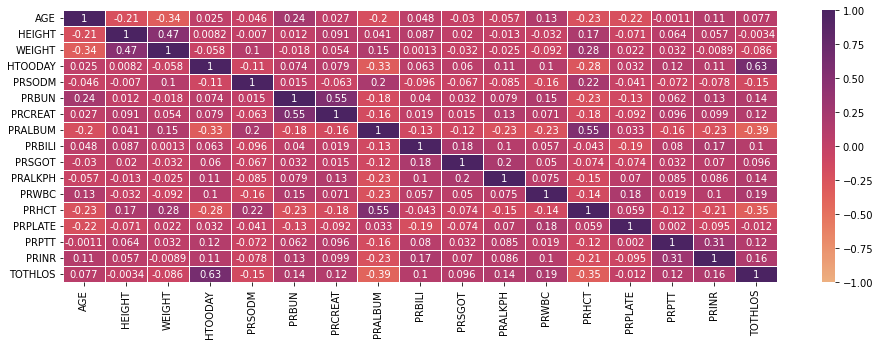

In [31]:
matrix = data.corr(numeric_only = True)
plt.figure(figsize = (16,5))
sns.heatmap(matrix, annot=True,vmax=1, vmin=-1, center=0, cmap="flare",linewidths=.5)
plt.show()

In [32]:
data.describe()

,AGE,HEIGHT,WEIGHT,HTOODAY,PRSODM,PRBUN,PRCREAT,PRALBUM,PRBILI,PRSGOT,PRALKPH,PRWBC,PRHCT,PRPLATE,PRPTT,PRINR,TOTHLOS
count,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000
mean,69.502522,65.436806,179.368896,1.258570,138.637878,19.924671,1.071011,3.730125,0.635912,27.464949,91.285904,8.404691,37.162514,235.891891,30.340971,1.084347,6.353250
std,14.115982,4.264127,50.821453,3.201079,3.589998,11.543624,0.911326,0.662925,0.547449,29.473736,53.122612,3.566320,6.213707,89.198677,7.346297,0.247505,7.152447
min,18.000000,36.000000,50.000000,0.000000,110.000000,1.000000,0.100000,1.000000,0.100000,1.000000,1.000000,0.100000,8.100000,1.000000,5.200000,0.100000,0.000000
25%,61.000000,62.000000,143.000000,0.000000,137.000000,13.000000,0.700000,3.300000,0.400000,17.000000,65.000000,6.100000,32.900002,178.000000,26.600000,1.000000,2.000000
50%,70.000000,65.000000,175.000000,0.000000,139.000000,17.000000,0.880000,3.800000,0.500000,22.000000,81.000000,7.700000,37.799999,226.000000,29.100000,1.000000,5.000000
75%,80.000000,68.000000,209.000000,1.000000,141.000000,23.000000,1.100000,4.200000,0.700000,29.000000,102.000000,9.900000,41.700001,280.000000,32.500000,1.100000,8.000000
max,90.000000,83.000000,528.000000,98.000000,180.000000,198.000000,15.000000,9.300000,15.000000,1000.000000,995.000000,78.400002,60.000000,988.000000,120.000000,10.000000,119.000000


In [33]:
data

,SEX,RACE_NEW,ETHNICITY_HISPANIC,INOUT,AGE,ELECTSURG,HEIGHT,WEIGHT,DIABETES,SMOKE,DYSPNEA,FNSTATUS2,VENTILAT,HXCOPD,ASCITES,HXCHF,HYPERMED,RENAFAIL,DIALYSIS,DISCANCR,HTOODAY,WNDINF,STEROID,WTLOSS,BLEEDIS,PRSEPIS,EMERGNCY,WNDCLAS,ASACLAS,OUPNEUMO,PRSODM,PRBUN,PRCREAT,PRALBUM,PRBILI,PRSGOT,PRALKPH,PRWBC,PRHCT,PRPLATE,PRPTT,PRINR,TOTHLOS
0,male,White,No,Inpatient,84,No,67.0,186.0,NO,No,MODERATE EXERTION,Independent,No,Yes,No,No,Yes,No,No,No,10.0,No,No,No,No,None,No,3-Contaminated,2-Mild Disturb,No Complication,138.0,17.000000,1.03,2.4,0.40,20.0,80.0,9.20,30.000000,412.0,22.400000,1.40,19.0
1,male,White,No,Inpatient,70,Yes,69.0,226.0,INSULIN,No,No,Independent,No,No,No,No,Yes,No,No,No,0.0,No,No,No,No,None,No,1-Clean,3-Severe Disturb,No Complication,141.0,23.000000,0.85,4.7,0.30,23.0,82.0,6.85,39.500000,162.0,26.900000,1.10,2.0
2,male,White,No,Inpatient,50,Yes,69.0,217.0,NO,No,No,Independent,No,No,No,No,No,No,No,No,0.0,No,No,No,No,None,No,1-Clean,2-Mild Disturb,No Complication,142.0,15.000000,0.93,5.1,0.70,24.0,58.0,5.72,45.500000,194.0,30.000000,1.00,1.0
3,male,White,No,Inpatient,61,Yes,71.0,170.0,NO,No,No,Independent,No,No,No,No,No,No,No,No,0.0,No,No,No,No,None,No,1-Clean,2-Mild Disturb,No Complication,137.0,10.000000,0.66,4.4,0.60,22.0,49.0,6.00,44.500000,209.0,30.000000,0.90,1.0
4,male,White,No,Inpatient,82,Yes,65.0,167.0,NO,No,No,Independent,No,No,No,No,Yes,No,No,No,0.0,No,No,No,No,None,No,1-Clean,3-Severe Disturb,No Complication,142.0,29.000000,1.01,4.9,0.50,19.0,94.0,5.06,40.799999,150.0,29.400000,1.10,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86757,female,White,No,Inpatient,63,Yes,64.0,185.0,NO,No,No,Independent,No,No,No,No,Yes,No,No,No,0.0,No,No,No,No,None,No,1-Clean,2-Mild Disturb,No Complication,135.0,16.299999,0.84,4.4,0.18,15.0,87.0,5.40,35.099998,269.0,32.299999,9.60,5.0
86758,female,White,No,Inpatient,78,Yes,65.0,162.0,NO,No,MODERATE EXERTION,Independent,No,No,No,No,No,No,No,No,0.0,No,No,No,No,None,No,1-Clean,3-Severe Disturb,No Complication,137.0,17.299999,1.20,4.1,0.34,24.0,63.0,7.20,35.000000,283.0,31.900000,0.92,5.0
86759,female,White,No,Inpatient,76,No,60.0,130.0,NO,No,MODERATE EXERTION,Independent,No,Yes,No,No,Yes,No,No,Yes,4.0,No,No,No,No,None,No,1-Clean,4-Life Threat,No Complication,137.0,24.500000,1.66,2.6,0.69,10.0,81.0,6.50,24.700001,234.0,43.599998,1.26,6.0
86760,female,Unknown/Not Reported,Unk,Inpatient,29,Yes,64.0,168.0,NO,Yes,No,Independent,No,No,No,No,No,No,No,No,0.0,No,No,No,No,None,No,1-Clean,2-Mild Disturb,No Complication,136.0,8.000000,0.90,4.9,0.20,83.0,100.0,9.00,38.000000,279.0,29.900000,1.10,9.0


## Data Encoding

I will encode all of the 'object' features using 'one-hot encoding' except 'WNDCLAS' and 'ASACLAS' - ordinal features

In [34]:
encoded_data = pd.get_dummies(data, columns = ['SEX',
 'RACE_NEW',
 'ETHNICITY_HISPANIC',
 'INOUT',
 'ELECTSURG',
 'DIABETES',
 'SMOKE',
 'DYSPNEA',
 'FNSTATUS2',
 'VENTILAT',
 'HXCOPD',
 'ASCITES',
 'HXCHF',
 'HYPERMED',
 'RENAFAIL',
 'DIALYSIS',
 'DISCANCR',
 'WNDINF',
 'STEROID',
 'WTLOSS',
 'BLEEDIS',
 'PRSEPIS',
 'EMERGNCY',
 'OUPNEUMO'])


#slice the attributes to one character and convert to integers
encoded_data['WNDCLAS'] = encoded_data['WNDCLAS'].str[:1]
encoded_data['WNDCLAS'] = encoded_data['WNDCLAS'].astype(int)

encoded_data['ASACLAS'] = encoded_data['ASACLAS'].str[:1]
encoded_data['ASACLAS'] = encoded_data['ASACLAS'].replace('N',0)
encoded_data['ASACLAS'] = encoded_data['ASACLAS'].astype(int)

In [35]:
encoded_data.describe()

,AGE,HEIGHT,WEIGHT,HTOODAY,WNDCLAS,ASACLAS,PRSODM,PRBUN,PRCREAT,PRALBUM,PRBILI,PRSGOT,PRALKPH,PRWBC,PRHCT,PRPLATE,PRPTT,PRINR,TOTHLOS,SEX_female,SEX_male,SEX_non-binary,RACE_NEW_American Indian or Alaska,RACE_NEW_American Indian or Alaska Native,RACE_NEW_Asian,RACE_NEW_Black or African American,RACE_NEW_Native Hawaiian or Pacifi,RACE_NEW_Native Hawaiian or Pacific Islander,RACE_NEW_Unknown/Not Reported,RACE_NEW_White,ETHNICITY_HISPANIC_N,ETHNICITY_HISPANIC_No,ETHNICITY_HISPANIC_U,ETHNICITY_HISPANIC_Unk,ETHNICITY_HISPANIC_Unknown,ETHNICITY_HISPANIC_Y,ETHNICITY_HISPANIC_Yes,INOUT_Inpatient,INOUT_Outpatient,ELECTSURG_No,ELECTSURG_Unk,ELECTSURG_Unknown,ELECTSURG_Yes,DIABETES_INSULIN,DIABETES_NO,DIABETES_NON-INSULIN,SMOKE_No,SMOKE_Yes,DYSPNEA_AT REST,DYSPNEA_MODERATE EXERTION,DYSPNEA_No,FNSTATUS2_Independent,FNSTATUS2_Partially Dependent,FNSTATUS2_Totally Dependent,FNSTATUS2_Unknown,VENTILAT_No,VENTILAT_Yes,HXCOPD_No,HXCOPD_Yes,ASCITES_No,ASCITES_Yes,HXCHF_No,HXCHF_Ye,HXCHF_Yes,HYPERMED_No,HYPERMED_Yes,RENAFAIL_No,RENAFAIL_Yes,DIALYSIS_No,DIALYSIS_Yes,DISCANCR_No,DISCANCR_Yes,WNDINF_No,WNDINF_Yes,STEROID_No,STEROID_Yes,WTLOSS_No,WTLOSS_Yes,BLEEDIS_No,BLEEDIS_Yes,PRSEPIS_None,PRSEPIS_SIRS,PRSEPIS_Sepsis,PRSEPIS_Septic,PRSEPIS_Septic Shock,EMERGNCY_No,EMERGNCY_Yes,OUPNEUMO_No Complication,OUPNEUMO_Pneumonia
count,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.000000,86058.00000,86058.000000,86058.000000,86058.000000,86058.000000
mean,69.502522,65.436806,179.368896,1.258570,1.199226,2.838365,138.637878,19.924671,1.071011,3.730125,0.635912,27.464949,91.285904,8.404691,37.162514,235.891891,30.340971,1.084347,6.353250,0.587464,0.412512,0.000023,0.001255,0.007379,0.021241,0.100944,0.000349,0.003184,0.114760,0.750889,0.332253,0.474564,0.055312,0.008552,0.047224,0.032571,0.049525,0.895013,0.104987,0.486590,0.000151,0.001046,0.512213,0.096296,0.777894,0.125810,0.854354,0.145646,0.008762,0.069058,0.922180,0.874178,0.100618,0.018046,0.007158,0.995480,0.004520,0.912466,0.087534,0.996258,0.003742,0.968777,0.002696,0.028527,0.348102,0.651898,0.991785,0.008215,0.975842,0.024158,0.967557,0.032443,0.945223,0.054777,0.940331,0.059669,0.985487,0.014513,0.894037,0.105963,0.909712,0.062888,0.023159,0.000511,0.00373,0.882358,0.117642,0.968835,0.031165
std,14.115982,4.264127,50.821453,3.201079,0.706423,0.666406,3.589998,11.543624,0.911326,0.662925,0.547449,29.473736,53.122612,3.566320,6.213707,89.198677,7.346297,0.247505,7.152447,0.492293,0.492289,0.004821,0.035403,0.085583,0.144189,0.301256,0.018668,0.056336,0.318734,0.432501,0.471024,0.499355,0.228589,0.092083,0.212119,0.177512,0.216962,0.306539,0.306539,0.499823,0.012290,0.032322,0.499854,0.294998,0.415664,0.331638,0.352753,0.352753,0.093193,0.253554,0.267889,0.331651,0.300824,0.133118,0.084302,0.067081,0.067081,0.282618,0.282618,0.061055,0.061055,0.173921,0.051852,0.166475,0.476371,0.476371,0.090266,0.090266,0.153541,0.153541,0.177175,0.177175,0.227546,0.227546,0.236874,0.236874,0.11

It seems that the most skewed column is total length of stay (TOTHLOS).  
Let's check closer and decide upon a thershold after which to remove records.

<AxesSubplot: xlabel='TOTHLOS', ylabel='Count'>

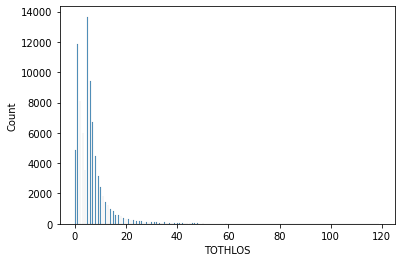

In [36]:
sns.histplot(data=encoded_data, x="TOTHLOS")

encoded_data.shape

In [38]:
encoded_data.drop(encoded_data[encoded_data.TOTHLOS > 40].index, inplace=True)

<AxesSubplot: xlabel='TOTHLOS', ylabel='Count'>

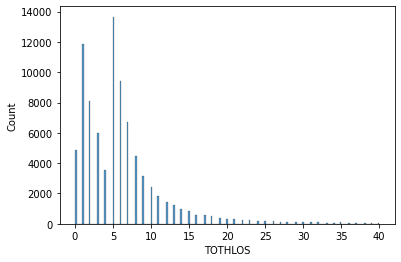

In [39]:
sns.histplot(data=encoded_data, x="TOTHLOS")

# Use SMOTE to balance data

First, split your data into test and train. I will only balance my train dataset. The test dataset will remain untouched. 

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
target = encoded_data.TOTHLOS
target = pd.DataFrame(target) 

features = encoded_data.drop('TOTHLOS',axis=1)

In [98]:
x = features
y = target

# split into train and test 
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.70)

In [99]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [100]:
sm = SMOTE(random_state=42)

In [101]:
features_res, target_res = sm.fit_resample(x_train1, y_train1)

In [102]:
print('Original dataset shape ',x_train1.shape)
print('Original dataset shape ', y_train1.shape)

print('Resampled dataset shape ',features_res.shape)
print('Resampled dataset shape ', target_res.shape)

Original dataset shape  (25636, 88)
Original dataset shape  (25636, 1)
Resampled dataset shape  (166296, 88)
Resampled dataset shape  (166296, 1)


<AxesSubplot: xlabel='TOTHLOS', ylabel='Count'>

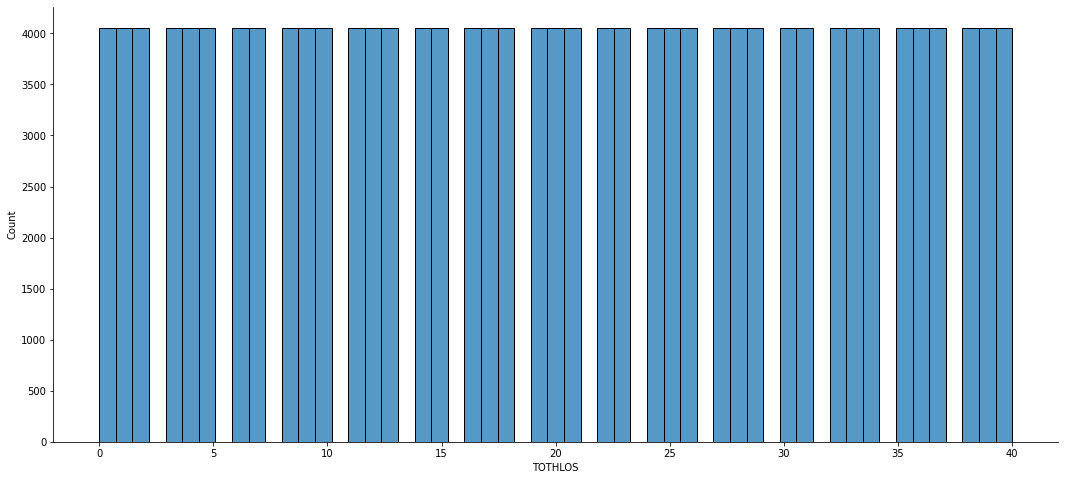

In [125]:
sns.histplot(data=target_res, x="TOTHLOS")

<AxesSubplot: xlabel='TOTHLOS', ylabel='Count'>

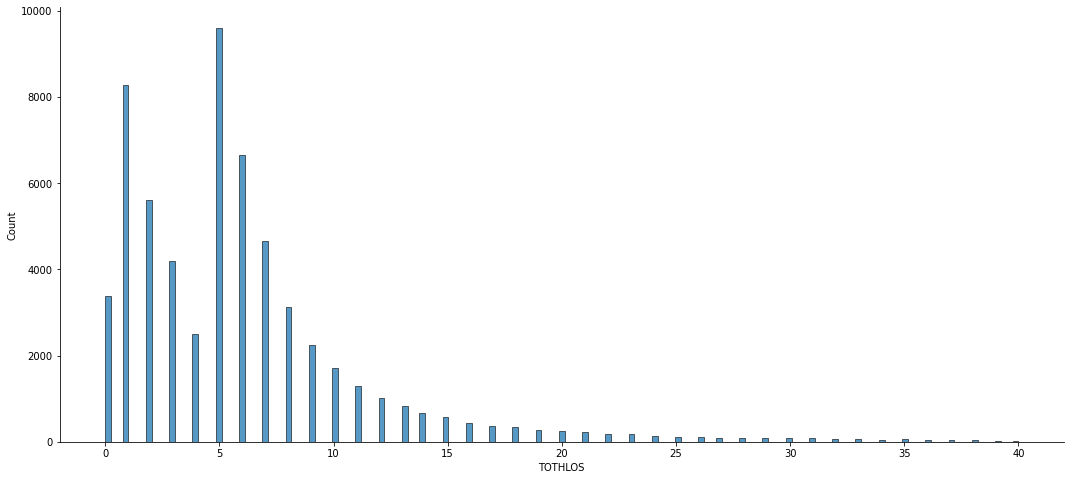

In [126]:
sns.histplot(data=y_test1, x="TOTHLOS")

# Model Training

## Import Libraries

In [52]:
# Libraries for linear regression
from pandas import Series
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import *
from sklearn import metrics
pd.options.mode.chained_assignment = None

In [53]:
#Libraries for nuearl network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import joblib 

In [60]:
#x_train = x_scaler.inverse_transform(x_train)
#y_train = y_scaler.inverse_transform(y_train)
#y_train_pred = y_scaler.inverse_transform(y_train_pred)

In [84]:
# Introduce the scaler
x_scaler = RobustScaler()
y_scaler = RobustScaler()

In [85]:
# Scale the x and y data 
x_train = x_scaler.fit_transform(features_res)
y_train = y_scaler.fit_transform(target_res)

x_test = x_scaler.fit_transform(x_test1)
y_test = y_scaler.fit_transform(y_test1)

# Linear Regression

In [58]:
linreg = LinearRegression().fit(x_train,y_train)

In [59]:
y_train_pred = linreg.predict(x_train)

In [61]:
print(linreg.score(x_train,y_train))

0.5780209103423246


In [62]:
y_test_pred = linreg.predict(x_test)

In [64]:
print(linreg.score(x_test,y_test))

0.3992306155593326


# Artificial Neural Networks

In [113]:
tf.keras.backend.clear_session()
del model, history, x_train, x_test, y_train, y_test, predictions_train, predictions_test

In [114]:
# Introduce the scaler
x_scaler = RobustScaler()
y_scaler = RobustScaler()

In [115]:
# Scale the x and y data 
x_train = x_scaler.fit_transform(features_res)
y_train = y_scaler.fit_transform(target_res)

x_test = x_scaler.fit_transform(x_test1)
y_test = y_scaler.fit_transform(y_test1)

In [116]:
print('x train: ',x_train.shape,'y train: ',y_train.shape)
print('x test: ',x_test.shape,'y test: ',y_test.shape)

x train:  (166296, 88) y train:  (166296, 1)
x test:  (59818, 88) y test:  (59818, 1)


In [117]:
# Create the neural network model
model = keras.Sequential(
    layers=[layers.Dense(128, input_dim=88, activation='relu',name='input'),
        layers.Dense(64, activation='relu',name='layer3'),
        layers.Dense(1, name='output')
    ],
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               11392     
                                                                 
 layer3 (Dense)              (None, 64)                8256      
                                                                 
 output (Dense)              (None, 1)                 65        
                                                                 
Total params: 19,713
Trainable params: 19,713
Non-trainable params: 0
_________________________________________________________________


In [119]:
model.compile(
    loss='mean_squared_error',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.MeanSquaredError(name='MSE'),
        tf.keras.metrics.RootMeanSquaredError(name='RMSE'),
        tf.keras.metrics.MeanAbsoluteError(name='MAE')]
)

In [120]:
history = model.fit(x_train, y_train, epochs=50, batch_size=49152, shuffle=True, verbose=2)

Epoch 1/50
4/4 - 2s - loss: 0.3716 - MSE: 0.3716 - RMSE: 0.6096 - MAE: 0.5181 - 2s/epoch - 393ms/step
Epoch 2/50
4/4 - 0s - loss: 0.2481 - MSE: 0.2481 - RMSE: 0.4981 - MAE: 0.4218 - 328ms/epoch - 82ms/step
Epoch 3/50
4/4 - 0s - loss: 0.1984 - MSE: 0.1984 - RMSE: 0.4455 - MAE: 0.3639 - 368ms/epoch - 92ms/step
Epoch 4/50
4/4 - 0s - loss: 0.1795 - MSE: 0.1795 - RMSE: 0.4237 - MAE: 0.3375 - 463ms/epoch - 116ms/step
Epoch 5/50
4/4 - 0s - loss: 0.1654 - MSE: 0.1654 - RMSE: 0.4067 - MAE: 0.3237 - 331ms/epoch - 83ms/step
Epoch 6/50
4/4 - 0s - loss: 0.1526 - MSE: 0.1526 - RMSE: 0.3907 - MAE: 0.3125 - 340ms/epoch - 85ms/step
Epoch 7/50
4/4 - 0s - loss: 0.1435 - MSE: 0.1435 - RMSE: 0.3788 - MAE: 0.3028 - 335ms/epoch - 84ms/step
Epoch 8/50
4/4 - 0s - loss: 0.1375 - MSE: 0.1375 - RMSE: 0.3709 - MAE: 0.2965 - 303ms/epoch - 76ms/step
Epoch 9/50
4/4 - 0s - loss: 0.1326 - MSE: 0.1326 - RMSE: 0.3641 - MAE: 0.2909 - 288ms/epoch - 72ms/step
Epoch 10/50
4/4 - 0s - loss: 0.1282 - MSE: 0.1282 - RMSE: 0.3580 

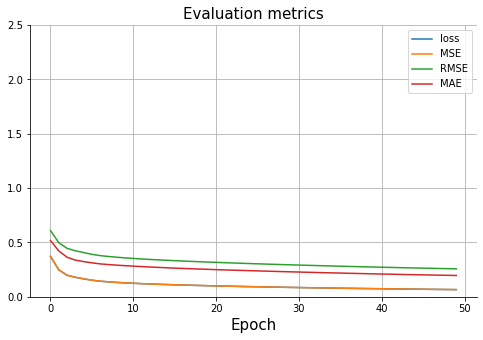

In [121]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2.5) # set the vertical range to [0-2.5]
plt.title('Evaluation metrics', size=15)
plt.xlabel('Epoch', size=15)
plt.show()

In [122]:
# Get the predictions on training set
predictions_train = model.predict(x_train, verbose=0)

# Get the predictions on TEST SET
predictions_test = model.predict(x_test, verbose=0)

In [123]:
# Transform all the features back 
y_train = y_scaler.inverse_transform(y_train)
predictions_train = y_scaler.inverse_transform(predictions_train)

y_test = y_scaler.inverse_transform(y_test)
predictions_test = y_scaler.inverse_transform(predictions_test)

In [124]:
# Report RMSE
rmse_train = mean_squared_error(y_train, predictions_train, squared=False)
# Report MSE
mse_train = mean_squared_error(y_train, predictions_train, squared=True)
# Report MAE
mae_train = mean_absolute_error(y_train, predictions_train)
# Report R2
r2_train = r2_score(y_train, predictions_train)

print('\n\033[1mTRAINING EVALUATION \033[0m')
print(f" MSE: {'{:.2f}'.format(mse_train)}")
print(f" RMSE: {'{:.2f}'.format(rmse_train)}")
print(f" MAE: {'{:.2f}'.format(mae_train)}")
print(f" R2: {'{:.2f}'.format(r2_train)}")


# Report RMSE
rmse_test = mean_squared_error(y_test, predictions_test, squared=False)
# Report MSE
mse_test = mean_squared_error(y_test, predictions_test, squared=True)
# Report MAE
mae_test = mean_absolute_error(y_test, predictions_test)
# Report R2 
r2_test = r2_score(y_test, predictions_test)

print('\n\033[1mTEST EVALUATION \033[0m')
print(f" MSE: {'{:.2f}'.format(mse_test)}")
print(f" RMSE: {'{:.2f}'.format(rmse_test)}")
print(f" MAE: {'{:.2f}'.format(mae_test)}")
print(f" R2: {'{:.2f}'.format(r2_test)}")


TRAINING EVALUATION 
 MSE: 1.64
 RMSE: 1.28
 MAE: 0.97
 R2: 0.81

TEST EVALUATION 
 MSE: 19.59
 RMSE: 4.43
 MAE: 2.68
 R2: 0.36


# Random Forrest 

In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn import set_config 

In [174]:
# Introduce the scaler
x_scaler = RobustScaler()
y_scaler = RobustScaler()

In [175]:
# get different scalers for each x and y 
x_train = x_scaler.fit_transform(features_res)
y_train = y_scaler.fit_transform(target_res)
y_train = y_train.ravel()

x_test = x_scaler.fit_transform(features)
y_test = y_scaler.fit_transform(target)
y_test = y_test.ravel()

In [178]:
forest = RandomForestRegressor(n_estimators = 10,
                              criterion='friedman_mse')

In [179]:
forest.fit(x_train,y_train)

RandomForestRegressor(criterion='friedman_mse', n_estimators=10)

In [180]:
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

In [181]:
print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 0.003, MSE test data: 0.941
R2 train data: 0.991, R2 test data: 0.228
